# Biomedical Engineering Department

### Data Loading and Preprocessing

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib as mpl


In [3]:
data = pd.read_csv('data/raw_survey_data_2022.csv',header=None)

In [4]:
df = pd.read_csv('data/raw_survey_data_2022.csv',header=1)

In [5]:
data.loc[0,data.iloc[0,:].str.contains('If you have read the survey up to this point')==True].index

Int64Index([176, 306], dtype='int64')

In [6]:
df_1=df[(df.iloc[:,176]=='2')&(df.iloc[:,306]=='4')]

In [7]:
## 2 response time more than 200s
def response_time(df,minimum=200):
    data1=df.iloc[:,1] #DataFrame with start time
    data2=df.iloc[:,2] #DataFrame with end time
    data3=df.iloc[:,3:] #DataFrame with data

    data3["time"]=data2.apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))-data1.apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))
    #(data1.iloc[:,1].values.astype('datetime64[D]')-data1.iloc[:,0].values.astype('datetime64[D]'))

                                                                                                    
    index_time= data3["time"].apply(lambda x: x/np.timedelta64(1, 's'))
    data3['clean']=(index_time>200)
    cleaned_data=data3.loc[data3.clean==True].iloc[:,:-2]

    return cleaned_data
cleaned_data=response_time(df_1,200)

cleaned_data.shape

(1271, 348)

In [8]:
## change some answer to numerical
def numeric_scale(cleaned_data):
    for i in range(cleaned_data.shape[0]):
        for j in range(cleaned_data.shape[1]):
            if cleaned_data.iloc[i,j]=='Strongly agree':
                cleaned_data.iloc[i,j]=5
            if cleaned_data.iloc[i,j]=='Agree':
                cleaned_data.iloc[i,j]=4
            if cleaned_data.iloc[i,j]in['Neither agree or disagree','Neither agree nor disagree','Neither disagree nor agree']:
                cleaned_data.iloc[i,j]=3
            if cleaned_data.iloc[i,j]=='Disagree':
                cleaned_data.iloc[i,j]=2
            if cleaned_data.iloc[i,j]=='Strongly disagree':
                cleaned_data.iloc[i,j]=1
    return cleaned_data


cleaned_data=numeric_scale(cleaned_data)

### Question 2022

In [9]:
# create the table of the first 2 rows to see the questions and the columns they locate
Q=data.iloc[:2,3:].T
Q.columns=['Question','Sub_Question']
#Q['location']=[ lambda x: x.index*(x.Question.isna()==False)]
Q=Q.reset_index(drop=True)
Q['location']=np.where(Q.Question.isna()==False, Q.Question.index, "False")

In [10]:
# Main questions
qq=Q[Q['location']!='False']
qq=qq.reset_index(drop=True)

### Question 2019

In [11]:
data2019 = pd.read_csv('data/Copy of de-identified Graduate Student Quality of Life Survey - Spring 2019.xlsx \
- Graduate Student Quality of Lif.csv',header=None)

In [12]:
# create the table of the first 2 rows to see the questions and the columns they locate
Q2019=data2019.iloc[:2,3:].T
Q2019.columns=['Question','Sub_Question']
#Q['location']=[ lambda x: x.index*(x.Question.isna()==False)]
Q2019=Q2019.reset_index(drop=True)
Q2019['location']=np.where(Q2019.Question.isna()==False, Q2019.Question.index, "False")

In [13]:
#Q2019.to_csv("output/Questions-19.csv", index=True)

In [14]:
##Find dataset for queryed text

def query_data(Q,qq,cleaned_data,query,indx):
    que=Q[Q['Question'].str.contains(query)==True]
    val=que.values
    ind=que.index.values
    print(Q.loc[ind[indx-1],'Question'])
    start=ind[indx-1]
    end=int(qq.iloc[qq[qq.location==str(ind[indx-1])].index+1]['location'])
    df_return=cleaned_data.iloc[:,start:end]
    return df_return

## Biomedical Engineering  Number of response increased from 87 to 138

In [15]:
degree=query_data(Q,qq,cleaned_data,'Current Academic Program',indx=1)
department=query_data(Q,qq,cleaned_data,'current academic department',indx=1)
gender=query_data(Q,qq,cleaned_data,'gender',indx=3)
LGBTQ=query_data(Q,qq,cleaned_data,'LGBTQ',indx=1)
ethnic=query_data(Q,qq,cleaned_data,'ethnic',indx=1)
country=query_data(Q,qq,cleaned_data,'Country',indx=1)
age=query_data(Q,qq,cleaned_data,'age',indx=3)

Current Academic Program
What is your current academic department or institute?
Please indicate the gender(s) with which you identify (check all that apply):
Do you identify yourself as part of the LGBTQ community?
Please identify your ethnic background.
Country of Origin
What is your current age?


In [16]:
department.value_counts()

Response.3                                    
Industrial Engineering and Operations Research    314
Computer Science                                  274
Electrical Engineering                            148
Biomedical Engineering                            138
Mechanical Engineering                             95
Data Science Institute                             76
Chemical Engineering                               68
Civil Engineering and Engineering Mechanics        62
Applied Physics and Applied Mathematics            58
Earth and Environmental Engineering                29
I prefer not to answer.                             9
dtype: int64

In [17]:
data_2019 = pd.read_csv('data/Copy of de-identified Graduate Student Quality of Life Survey - Spring 2019.xlsx \
- Graduate Student Quality of Lif.csv',header=1)
# use the same way to clean 2019 data
print(data_2019.shape)
cleaned_data_2019=response_time(data_2019,200)
print(cleaned_data_2019.shape)
d2019=numeric_scale(cleaned_data_2019)

(1033, 345)
(997, 342)


In [18]:
department2019=query_data(Q,qq,d2019,'current academic department',indx=1)
department2019.value_counts()

What is your current academic department or institute?


Response.3                                    
Industrial Engineering and Operations Research    243
Computer Science                                  150
Electrical Engineering                            116
Civil Engineering and Engineering Mechanics        88
Biomedical Engineering                             87
Mechanical Engineering                             81
Data Science Institute                             70
Applied Physics and Applied Mathematics            56
Chemical Engineering                               49
Earth and Environmental Engineering                38
I prefer not to answer.                             9
dtype: int64

In [19]:
cleaned_data['department']=department
cleaned_data['degree']=degree
#cleaned_data['gender']=gender
#cleaned_data['LGBTQ']=LGBTQ

In [20]:
degree2019=query_data(Q,qq,cleaned_data_2019,'Current Academic Program',indx=1)
gender2019=query_data(Q,qq,cleaned_data_2019,'gender',indx=3)
LGBTQ2019=query_data(Q,qq,cleaned_data_2019,'LGBTQ',indx=1)

Current Academic Program
Please indicate the gender(s) with which you identify (check all that apply):
Do you identify yourself as part of the LGBTQ community?


In [26]:
cleaned_data_2019['department']=department2019
cleaned_data_2019['degree']=degree2019
#cleaned_data_2019['gender']=gender2019
#cleaned_data_2019['LGBTQ']=LGBTQ2019

#### Create Dataset for BMEN only

In [27]:
df2022=cleaned_data[cleaned_data['department']=='Biomedical Engineering']
df2019=cleaned_data_2019[cleaned_data_2019['department']=='Biomedical Engineering']

In [28]:
df2019.columns=pd.MultiIndex.from_tuples(zip((Q2019['Question']).append(pd.Series(['department','degree'],index=[342, 343])), df2019.columns), names=["first", "second"])
df2022.columns=pd.MultiIndex.from_tuples(zip((Q['Question']).append(pd.Series(['department','degree'],index=[348, 349])), df2022.columns), names=["first", "second"])


/var/folders/_r/5vgvtlc95cvfjt0qzlww6hhm0000gn/T/ipykernel_29961/622508879.py:1: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2019.columns=pd.MultiIndex.from_tuples(zip((Q2019['Question']).append(pd.Series(['department','degree'],index=[342, 343])), df2019.columns), names=["first", "second"])
/var/folders/_r/5vgvtlc95cvfjt0qzlww6hhm0000gn/T/ipykernel_29961/622508879.py:2: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2022.columns=pd.MultiIndex.from_tuples(zip((Q['Question']).append(pd.Series(['department','degree'],index=[348, 349])), df2022.columns), names=["first", "second"])


In [29]:
df2022

first  I am satisfied with my overall experience at Columbia.  \
second                                               Response   
0                                                       4       
16                                                      5       
17                                                      3       
22                                                      3       
49                                                      2       
...                                                   ...       
1547                                                    4       
1551                                                    4       
1563                                                    4       
1580                                                    3       
1587                                                    4       

first  I am satisfied with the following with respect to my overall experience at Columbia.  \
second                                                                            Academics   
0                                                       5                                     
16                                                      5                                     
17                                                      2                                     
22                                                      4                                     
49                                                      2                                     
...                                                   ...                                     
1547                                                    4                                     
1551                                                    4                                     
1563                                                    4                                     
1580                                                    4                                     
1587                                                    3                                     

first            NaN                                                       \
second Mental health Physical health Professional development Social life   
0                  4               4                        4           4   
16                 5               5                        5           5   
17                 2               2                        2           4   
22                 3               3                        4           2   
49                 4               2                        2           2   
...              ...             ...                      ...         ...   
1547               3               4                        4           3   
1551               4               5                        3           4   
1563               4               4                        4           4   
1580               2               2                        4           4   
1587               4               5                        5           5   

first                                                                 \
second Career Placement Team Housing Intercampus Shuttle/Via Service   
0                          4       3                               3   
16                         5       3                               3   
17                         2       2                               2   
22                         3       3                               3   
49                         4       1                               4   
...                      ...     ...                             ...   
1547                       4       2                               4   
1551                       3       4                               5   
1563                       3       4                               3   
1580                       4       3                               2   
1587                       3       4                

In [452]:
#df2019.to_csv('BMEN/Response2019.csv')

In [467]:
#df2022.to_csv('BMEN/Response2022.csv')

## Basic Statistics

In [22]:
df2019=pd.read_csv('BMEN/BMEN/Response2019.csv',header=[0, 1], skipinitialspace=True,index_col=0)
df2022=pd.read_csv('BMEN/BMEN/Response2022.csv',header=[0, 1], skipinitialspace=True,index_col=0)

In [24]:
df2019

first  I am satisfied with my overall experience at Columbia.  \
second                                               Response   
0                                                       4       
47                                                      5       
70                                                      4       
74                                                      4       
81                                                      4       
...                                                   ...       
1000                                                    4       
1005                                                    4       
1006                                                    5       
1009                                                    5       
1012                                                    5       

first  I am satisfied with the following with respect to my overall experience at Columbia.  \
second                                                                            Academics   
0                                                       4                                     
47                                                      5                                     
70                                                      5                                     
74                                                      4                                     
81                                                      2                                     
...                                                   ...                                     
1000                                                    2                                     
1005                                                    4                                     
1006                                                    5                                     
1009                                                    4                                     
1012                                                    4                                     

first            nan                                                       \
second Mental health Physical health Professional development Social life   
0                  4               4                        4           4   
47                 5               5                        5           5   
70                 3               3                        3           3   
74                 4               4                        5           4   
81                 3               3                        4           4   
...              ...             ...                      ...         ...   
1000               2               4                        3           2   
1005               4               2                        4           4   
1006               5               5                        5           5   
1009               4               4                        4           4   
1012               4               4                        4           4   

first                                                                ...  \
second Career services Housing Intercampus Shuttle Library services  ...   
0                    5       5                   4                5  ...   
47                   5       5                   3                5  ...   
70                   3       3                   4                3  ...   
74                   4       4                   4                4  ...   
81                   3       4                   1                4  ...   
...                ...     ...                 ...              ...  ...   
1000                 3       2                   2                4  ...   
1005                 3       2                   2                4  ...   
1006                 5       5                   5                5  ...   
1009                 4       4                   4                4  ...   
1012

In [23]:
df2022['degree'].value_counts()

degree                      
Master of Science (M.S.)        74
Doctor of Philosophy (Ph.D.)    43
M.S. leading to Ph.D.           21
dtype: int64

In [476]:
df2019['degree'].value_counts()

degree                                   
Master of Science (M.S.)                     36
Doctor of Philosophy (Ph.D.)                 28
M.S. leading to Ph.D.                        22
Doctor of Engineering Science (Eng.Sc.D.)     1
dtype: int64

In [477]:
dg=pd.DataFrame(df2019['degree'].value_counts())
dg.rename(columns={"degree":'2019'},inplace=True)
dg['2022']=df2022['degree'].value_counts()
dg.rename(inplace=True,index={'Master of Science (M.S.)':'M.S.','Doctor of Philosophy (Ph.D.)':'Ph.D.'\
                                         ,'Doctor of Engineering Science (Eng.Sc.D.)':'Eng.Sc.D.'})

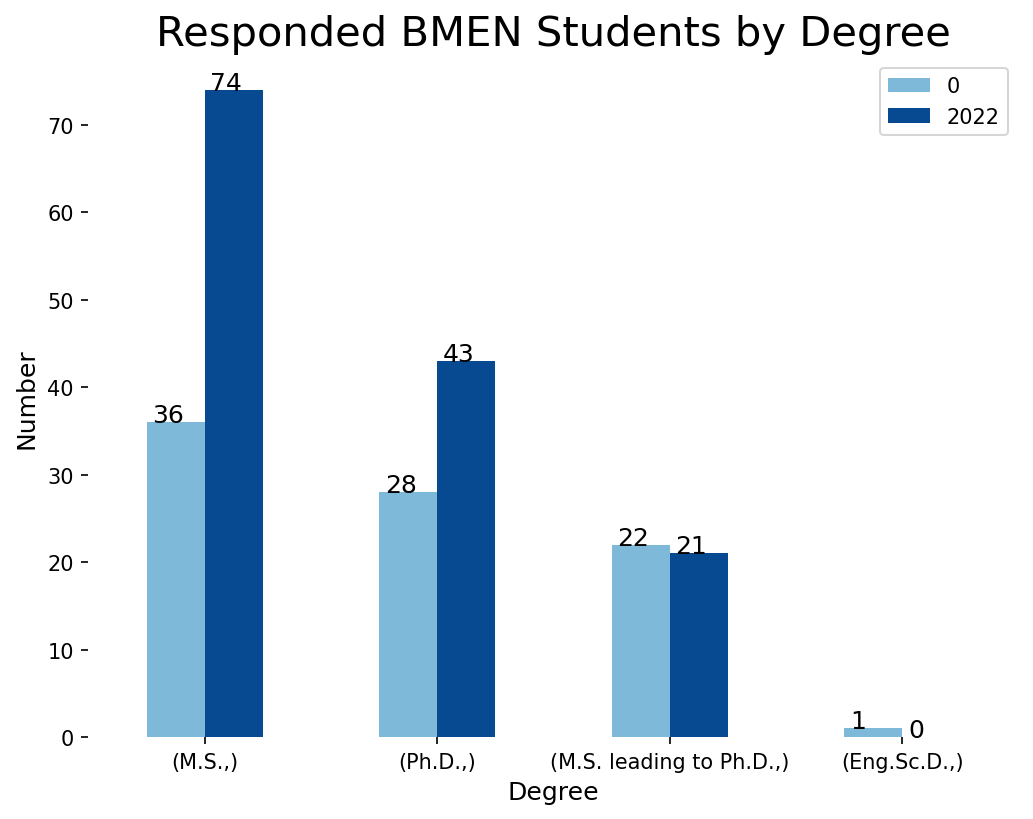

In [478]:
cmap = mpl.cm.Blues(np.linspace(0.4,0.9,100))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
fig,ax=plt.subplots(figsize=(8,6),dpi=150)

dg.plot(kind='bar',colormap=cmap,ax=ax)

plt.ylabel("Number",fontsize=12)
plt.xlabel("Degree",fontsize=12)
plt.title("Responded BMEN Students by Degree",fontsize=20)
plt.xticks(rotation=0)
x_offset = -0.1
y_offset = 0.0
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.0f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2+ x_offset, b.y1+y_offset),fontsize=12)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)




## Satisfaction of Biomedical Engineering Department

In [479]:
sat2019=query_data(Q,qq,df2019,'satisfied',indx=1)
sat2022=query_data(Q,qq,df2022,'satisfied',indx=1)

I am satisfied with my overall experience at Columbia.
I am satisfied with my overall experience at Columbia.


In [480]:
print(f'Mean Satisfaction of 2019 is : {sat2019.mean().sum():0.3f}')
print(f'Mean Satisfaction of 2022 is : {sat2022.mean().sum():0.3f}')

Mean Satisfaction of 2019 is : 3.828
Mean Satisfaction of 2022 is : 3.761


In [348]:
a=pd.DataFrame(((sat2019.Response.value_counts()).sort_index(ascending=True)))
a.rename(columns={"Response":'2019'},inplace=True)
b=(sat2022.Response.value_counts()).sort_index(ascending=True)
a['2022']=(b)
a

,2019,2022
1,2,5
2,5,9
3,13,22
4,53,80
5,14,22


In [350]:
aa=a.apply(lambda x: x / x.sum(), axis=0)

In [114]:
aa

,2019,2022
1,0.022989,0.036232
2,0.057471,0.065217
3,0.149425,0.159420
4,0.609195,0.579710
5,0.160920,0.159420


In [351]:

ind=['Strongly agree','Agree','Neither agree \n nor disagree','Disagree','Strongly disagree'][::-1]
aa.rename(index={1:ind[0],2:ind[1],3:ind[2],4:ind[3],5:ind[4]},inplace=True)


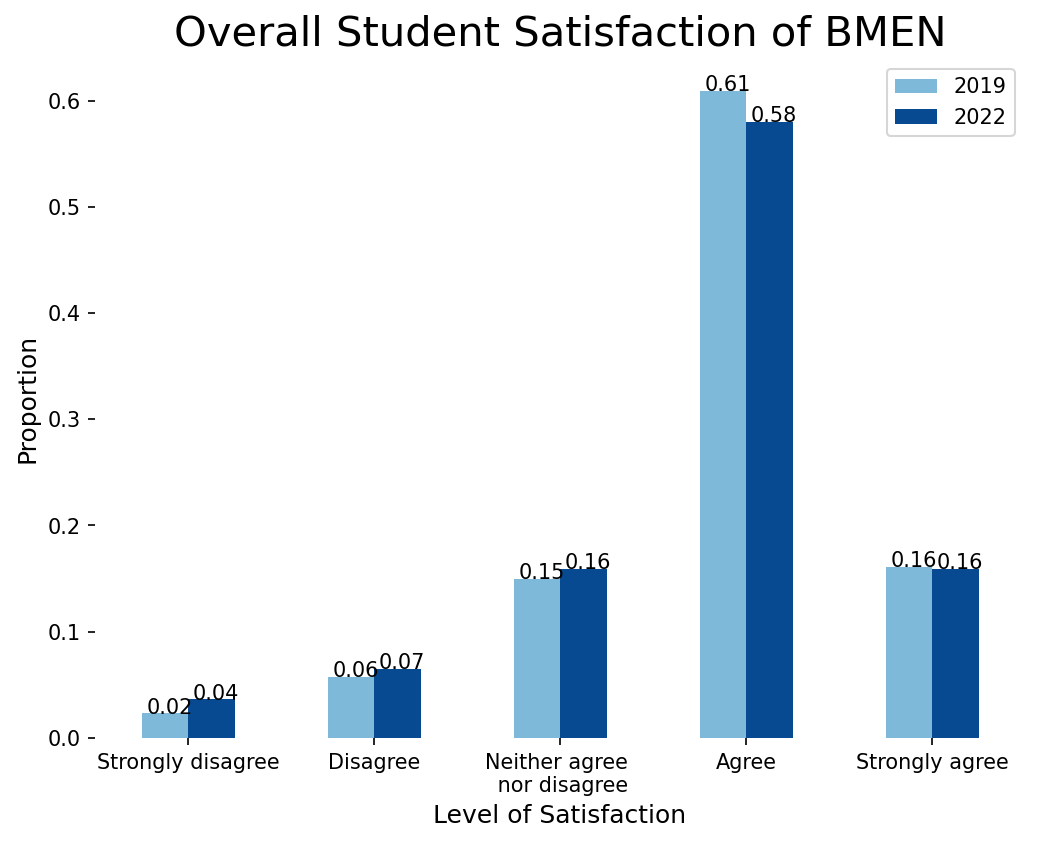

In [352]:
cmap = mpl.cm.Blues(np.linspace(0.4,0.9,100))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
fig,ax=plt.subplots(figsize=(8,6),dpi=150)

aa.plot(kind='bar',colormap=cmap,ax=ax)

plt.ylabel("Proportion",fontsize=12)
plt.xlabel("Level of Satisfaction",fontsize=12)
plt.title("Overall Student Satisfaction of BMEN",fontsize=20)
plt.xticks(rotation=0)
x_offset = -0.1
y_offset = 0.0
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2+ x_offset, b.y1+y_offset),fontsize=10)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



### 

## 

## 



## Satisfaction v.s Importance

In [237]:
important_2019=query_data(Q,qq,df2019,"important",indx=1)
satisfied2_2019 = query_data(Q,qq,df2019,"satisfied",indx=2)

The following are important with respect to my overall experience at Columbia.
I am satisfied with the following with respect to my overall experience at Columbia.


In [238]:
important_2022=query_data(Q,qq,df2022,"important",indx=1)
satisfied2_2022 = query_data(Q,qq,df2022,"satisfied",indx=2)

The following are important with respect to my overall experience at Columbia.
I am satisfied with the following with respect to my overall experience at Columbia.


In [243]:
a=pd.DataFrame(satisfied2_2022.mean()).T
b=pd.DataFrame(important_2022.mean()).T
b.columns=a.columns
c2022=pd.concat([a,b],ignore_index=True)
c2022

,Academics,Mental health,Physical health,Professional development,Social life,Career Placement Team,Housing,Intercampus Shuttle/Via Service,Library services,Funding opportunities,Student life and academic advising,Technology services and support
0,3.731884,3.268116,3.456522,3.775362,3.739130,3.471014,3.072464,3.427536,3.949275,3.239130,3.586957,3.623188
1,4.572464,4.420290,4.275362,4.376812,4.173913,4.181159,4.014493,3.956522,3.811594,4.028986,4.268116,3.927536


In [242]:
a=pd.DataFrame(satisfied2_2019.mean()).T
b=pd.DataFrame(important_2019.mean()).T
b.columns=a.columns
c2019=pd.concat([a,b],ignore_index=True)
c2019

,Academics,Mental health,Physical health,Professional development,Social life,Career services,Housing,Intercampus Shuttle,Library services,Funding opportunities,Student life and academic advising,Technology services and support
0,3.873563,3.436782,3.333333,3.770115,3.609195,3.609195,3.390805,3.160920,3.988506,3.333333,3.586207,3.666667
1,4.574713,4.356322,4.333333,4.390805,4.068966,4.298851,4.011494,3.827586,3.931034,4.287356,4.218391,3.977011


In [248]:
c2022.iloc[1,:].mean()

4.167270531400965

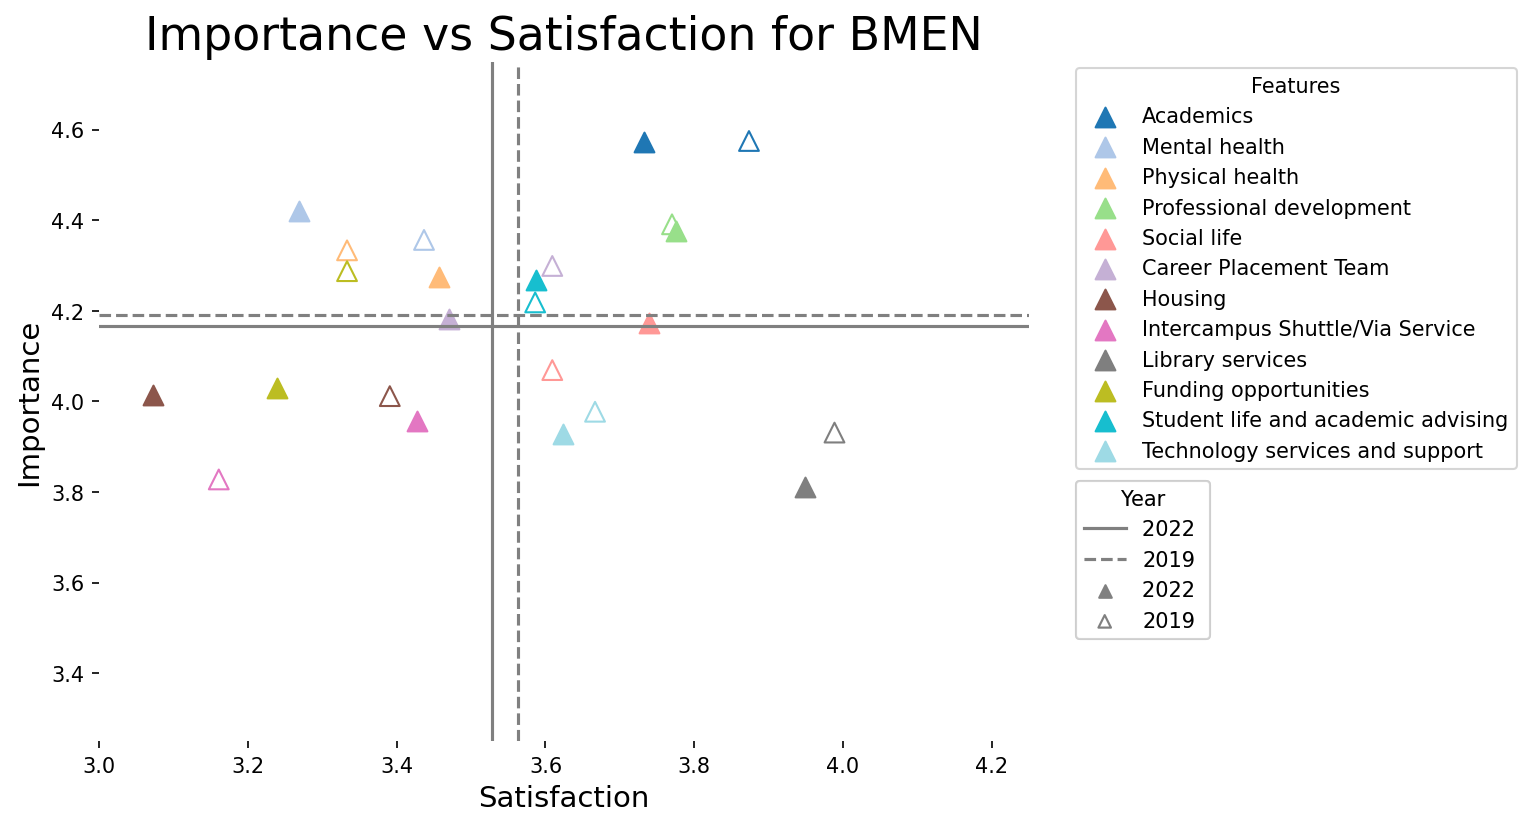

In [253]:
import matplotlib.cm as cm
colors = cm.tab20(np.linspace(0, 1, (12)))

fig,ax=plt.subplots(figsize=(8,6),dpi=150)

for i in range(12):
    ax.scatter(c2022.iloc[0,i], c2022.iloc[1,i],s=90,marker='^',label=c2022.columns[i],c=colors[i].reshape(1,-1))

for i in range(12):
    ax.scatter(c2019.iloc[0,i], c2019.iloc[1,i],s=90,marker='^',facecolors='none',edgecolors=colors[i].reshape(1,-1))

line1=ax.axhline(y=c2022.iloc[1,:].mean(),c='grey')
ax.axvline(x=c2022.iloc[0,:].mean(),c='grey' )

line2=ax.axhline(y=c2019.iloc[1,:].mean(),c='grey',ls='--')
ax.axvline(x=c2019.iloc[0,:].mean(),c='grey' ,ls='--')


ax.set_xlim([3.0, 4.250])
ax.set_ylim([3.25, 4.750])


ax.set_title("Importance vs Satisfaction for BMEN",fontsize=22)

leg = plt.legend(loc=(1.05,0.4), title="Features")
ax.add_artist(leg)
#leg = plt.legend(,loc=(1.05,0.4), title="Year")


#import matplotlib.lines as mlines

import matplotlib.patches as mpatches

grey_triangle1 = ax.scatter([], [], color='grey', marker='^', linestyle='None')
grey_triangle2 = ax.scatter([], [], color='grey', marker='^', facecolors='none',edgecolors="grey",linestyle='None')

#first_legend=plt.legend([line1,line2],['2022','2019'],bbox_to_anchor=(1, 1.05))
leg1=plt.legend(handles=[line1,line2,grey_triangle1,grey_triangle2], labels=['2022 ','2019','2022 ','2019'],loc=(1.05,0.15), title="Year")
ax.add_artist(leg1)

ax.set_xlabel("Satisfaction",fontsize=14)
ax.set_ylabel("Importance",fontsize=14)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)



plt.show()

## Academics

In [186]:
aca_import_2019=query_data(Q,qq,df2019,"academics",indx=1)
aca_import_2022=query_data(Q,qq,df2022,"academics",indx=1)

The following are important with respect to my overall satisfaction with SEAS classes and academics.
The following are important with respect to my overall satisfaction with SEAS classes and academics.


In [365]:
aca_import_2019.mean(axis=0)

Instruction                                                       4.425287
Course content                                                    4.413793
Supplementary educational tools                                   3.724138
Degree requirements                                               3.942529
The overall teaching quality of the lecturer was satisfactory:    3.770115
dtype: float64

In [385]:
aca=pd.DataFrame(aca_import_2019.mean(axis=0)[:4])
aca.rename(columns={0:'2019'},inplace=True)
aca['2022']=(aca_import_2022.mean(axis=0)[:4])
aca.rename(index={'Supplementary educational tools':'Supplementary \n educational tools'},inplace=True)



In [386]:
aca

,2019,2022
Instruction,4.425287,4.355072
Course content,4.413793,4.362319
Supplementary \n educational tools,3.724138,3.804348
Degree requirements,3.942529,3.971014


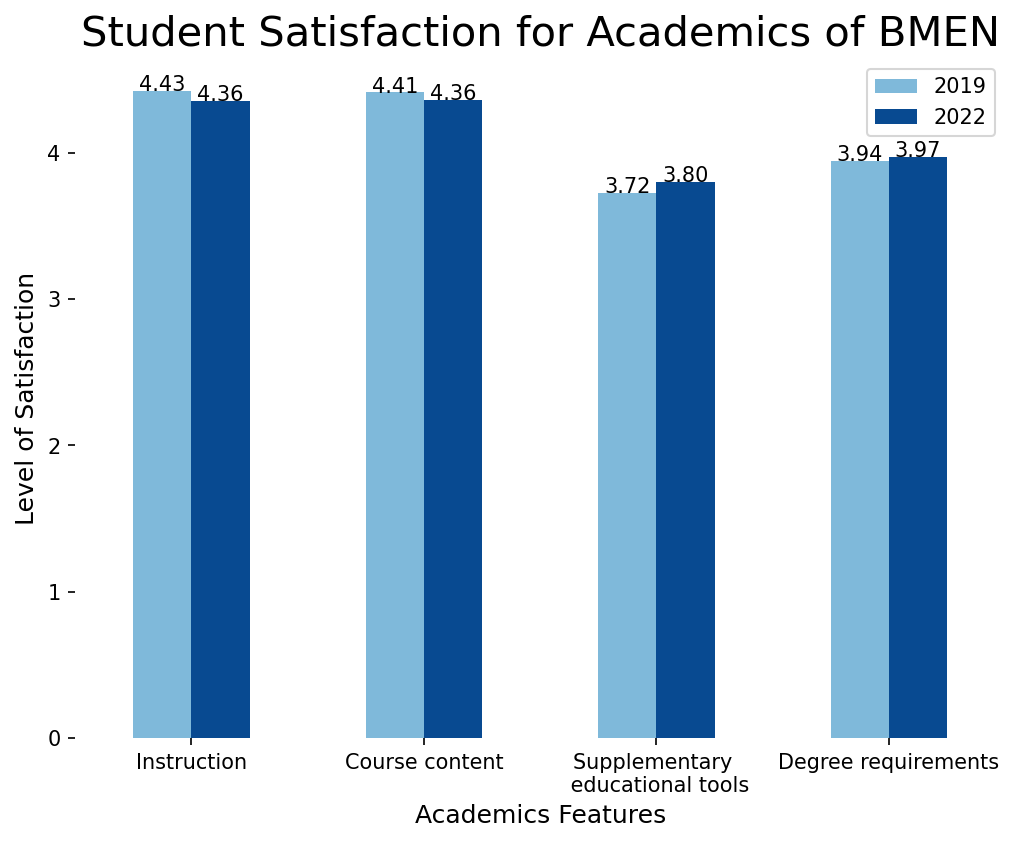

In [387]:
cmap = mpl.cm.Blues(np.linspace(0.4,0.9,100))
cmap = mpl.colors.ListedColormap(cmap[10:,:-1])
fig,ax=plt.subplots(figsize=(8,6),dpi=150)

aca.plot(kind='bar',colormap=cmap,ax=ax)

plt.ylabel("Level of Satisfaction",fontsize=12)
plt.xlabel("Academics Features",fontsize=12)
plt.title("Student Satisfaction for Academics of BMEN",fontsize=20)
plt.xticks(rotation=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

x_offset = -0.1
y_offset = 0.0
for p in ax.patches:
    b = p.get_bbox()
    val = "{:.2f}".format(b.y1 + b.y0)        
    ax.annotate(val, ((b.x0 + b.x1)/2+ x_offset, b.y1+y_offset),fontsize=10)


